In [1]:
import symforce

In [2]:
symforce.set_symbolic_api("sympy")
symforce.set_log_level("warning")
from symforce.notebook_util import display, print_expression_tree

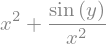

TypeError: Code expects text, not x**2 + sin(y)/x**2

In [96]:
import symforce.symbolic as sf

x = sf.Symbol("x")
y = sf.Symbol("y")
expr = x**2 + sf.sin(y)/x**2
display(expr)
from IPython.display import Code
Code(expr)

In [6]:
print_expression_tree(expr)

Add: x**2 + sin(y)/x**2
+-Pow: x**2
| +-Symbol: x
| +-Integer: 2
+-Mul: sin(y)/x**2
  +-Pow: x**(-2)
  | +-Symbol: x
  | +-Integer: -2
  +-sin: sin(y)
    +-Symbol: y


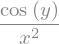

In [7]:
display(expr.diff(y))

In [8]:
display(expr.subs({x:1.2, y:0.4}))

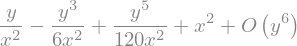

In [9]:
display(sf.series(expr,y))

In [10]:
from symforce import ops
display(sf.Rot3())

<Rot3 <Q xyzw=[0, 0, 0, 1]>>

In [11]:
display(sf.Rot3.symbolic("R"))

<Rot3 <Q xyzw=[R_x, R_y, R_z, R_w]>>

In [12]:
qv = sf.V3.symbolic("qv")
qw = sf.Symbol("qw")
quat = sf.Quaternion(xyz=qv, w=qw)

In [13]:
display(quat)

<Q xyzw=[qv0, qv1, qv2, qw]>

In [14]:
R_from_quat = sf.Rot3(quat)

In [15]:
display(R_from_quat)

<Rot3 <Q xyzw=[qv0, qv1, qv2, qw]>>

In [16]:
theta = sf.Symbol("theta")

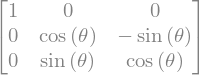

<Rot3 <Q xyzw=[(1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1)))*(sqrt(Max(0, 2 - 2*cos(theta)))/2 + Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1))/2) + 2*sin(theta)*Min(1 - Max(0, sign(-2*cos(theta) + Max(1, 2*cos(theta) + 1, cos(theta)) - 1)), 1 - Max(0, 1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1)), Min(1 - Max(0, sign(-cos(theta) + Max(1, 2*cos(theta) + 1, cos(theta)))), Max(1 - Max(0, 1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1))), 1 - Max(0, 1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1)), Min(1 - Max(0, 1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1))), 1 - Max(0, sign(-cos(theta) + Max(1, 2*cos(theta) + 1, cos(theta))))))))))/(2*sqrt(Max(0, 2*cos(theta) + 2)) - 2*Min(1 - Max(0, sign(-2*cos(theta) + Max(1, 2*cos(theta) + 1, cos(theta)) - 1)), 1 - Max(0, 1 - Max(0, sign(Max(1, 2*cos(theta) + 1, cos(theta)) - 1)), Min(1 - Max(0, sign(-cos(theta) + Max(1, 2*cos(theta) + 1, cos(theta)))), Max(1 - Max(0, 1 - Max(0, sig

⎡                                                                                                                                                     
⎢                                                                                                                                                     
⎢                                                                                                                                                     
⎢                                                                                                                                                     
⎢                                                                                                                                                     
⎢                                                                                                                                                     
⎢                                                                                             

In [18]:
R_mat = sf.Matrix( [[ 1, 0,0],
                  [0,sf.cos(theta), -sf.sin(theta)],
                  [0, sf.sin(theta), sf.cos(theta)],
                  ])
R = sf.Rot3.from_rotation_matrix(R_mat)
display(R_mat)
display(R)
display(R.to_rotation_matrix())

In [19]:
R = sf.Rot3.from_yaw_pitch_roll(0,0,theta)
ypr = R.to_yaw_pitch_roll()

In [22]:
display(R)
display(ops.StorageOps.simplify(list(ypr)))

<Rot3 <Q xyzw=[sin(theta/2), 0, 0, cos(theta/2)]>>

In [23]:
world_R_body = sf.Rot3.symbolic("R")

In [24]:
body_t_point = sf.Vector3.symbolic("p")

In [25]:
world_t_point = world_R_body*body_t_point;

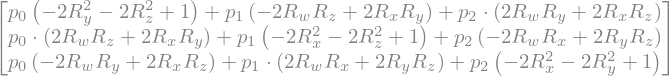

In [26]:
display(world_t_point)

In [27]:
body_R_cam = sf.Rot3.symbolic("R_cam")

In [28]:
world_R_cam = world_R_body*body_R_cam

In [34]:
cam_R_world = world_R_cam.inverse()
display(body_R_cam)
display(cam_R_body)

<Rot3 <Q xyzw=[R_cam_x, R_cam_y, R_cam_z, R_cam_w]>>

<Rot3 <Q xyzw=[-R_cam_x, -R_cam_y, -R_cam_z, R_cam_w]>>

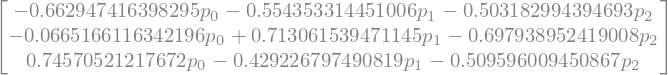

In [37]:
world_R_body_numeric = sf.Rot3.from_yaw_pitch_roll(0.1, -2.3, 0.7)
display(world_t_point.subs(world_R_body, world_R_body_numeric))

In [38]:
world_T_body = sf.Pose3.symbolic("T")
display(world_T_body)

<Pose3 R=<Rot3 <Q xyzw=[T.R_x, T.R_y, T.R_z, T.R_w]>>, t=(T.t0, T.t1, T.t2)>

In [39]:
world_R_body = sf.Rot3.symbolic("R")
world_t_body = sf.Vector3.symbolic("t")

In [40]:
world_T_body = sf.Pose3(R=world_R_body, t=world_t_body)

In [41]:
display(world_T_body)

<Pose3 R=<Rot3 <Q xyzw=[R_x, R_y, R_z, R_w]>>, t=(t0, t1, t2)>

In [42]:
body_T_cam = sf.Pose3.symbolic("T_cam")
world_T_cam =  world_T_body*body_T_cam

In [43]:
body_t_point = sf.Vector3.symbolic("p")

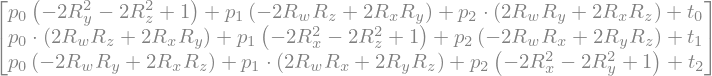

In [44]:
world_t_point = world_T_body*body_t_point
display(world_t_point)

In [45]:
body_T_world = world_T_body.inverse()

In [46]:
display(world_T_body)

<Pose3 R=<Rot3 <Q xyzw=[R_x, R_y, R_z, R_w]>>, t=(t0, t1, t2)>

In [47]:
display(body_T_world)

<Pose3 R=<Rot3 <Q xyzw=[-R_x, -R_y, -R_z, R_w]>>, t=(-t0*(-2*R_y**2 - 2*R_z**2 + 1) - t1*(2*R_w*R_z + 2*R_x*R_y) - t2*(-2*R_w*R_y + 2*R_x*R_z), -t0*(-2*R_w*R_z + 2*R_x*R_y) - t1*(-2*R_x**2 - 2*R_z**2 + 1) - t2*(2*R_w*R_x + 2*R_y*R_z), -t0*(2*R_w*R_y + 2*R_x*R_z) - t1*(-2*R_w*R_x + 2*R_y*R_z) - t2*(-2*R_x**2 - 2*R_y**2 + 1))>

# Vector and matrices

In [48]:
m1 = sf.Matrix([[1,2,3],[4,5,6]])
m2 = sf.Matrix(2,3,[1,2,3,4,5,6])

In [49]:
m3 = sf.Matrix23(1,2,3,4,5,6)
m4 = sf.Matrix23([1,2,3,4,5,6])

In [50]:
m5 = sf.M([[1,2,3],[4,5,6]])

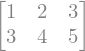

In [51]:
m9 = sf.Matrix23.block_matrix([[sf.M13([1,2,3])],[sf.M13([3,4,5])]])
display(m9)

In [54]:
v1 = sf.Matrix([[1],[2],[3]])
v2 = sf.Matrix([1,2,3])

In [56]:
display(v1)
display(v2) # column vector

In [57]:
v3 = sf.Vector3(1,2,3)

In [58]:
display(v3)

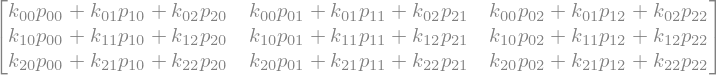

In [59]:
m12 = sf.M33.symbolic("k")
m23 = sf.M33.symbolic("p")
display(m12*m23)

In [63]:
norm = sf.Vector3.symbolic("v").norm()
squared_norm = sf.Vector3.symbolic("v").squared_norm()

In [64]:
unit_v = sf.Vector3.symbolic("v").normalized()

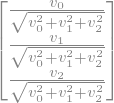

In [65]:
display(unit_v)

# Jacobians of matrices

In [66]:
R0 = sf.Rot3.symbolic("R0")
R1 = sf.Rot3.symbolic("R1")

In [67]:
residual = sf.M(R0.local_coordinates(R1))

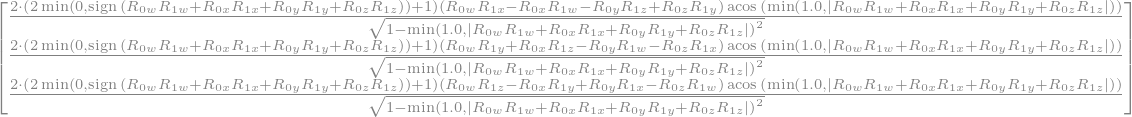

In [68]:
display(residual)

In [69]:
jacobian = residual.jacobian(R1)

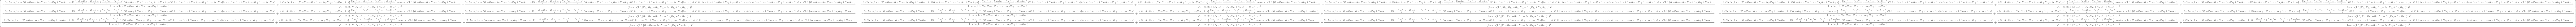

In [70]:
display(jacobian)

# Properties of geometric objects


In [71]:
rot = sf.Rot3.symbolic("R")

In [72]:
elements = rot.to_storage()

In [73]:
assert len(elements) == rot.storage_dim()

In [74]:
display(elements)

In [75]:
rot2 = sf.Rot3.from_storage(elements)

In [76]:
assert rot == rot2


In [77]:
R1 = sf.Rot3.random()

In [78]:
R2 = sf.Rot3.random()


In [79]:
display(R1.compose(R2))

<Rot3 <Q xyzw=[-0.115366020771119, -0.366057658913891, 0.909590284711484, -0.159179099006120]>>

# Lie group operations


In [80]:
R1 = sf.Rot3.random()

In [81]:
tangent_vec = R1.to_tangent()

In [82]:
R1_recovered = sf.Rot3.from_tangent(tangent_vec)

In [83]:
assert len(tangent_vec) == R1.tangent_dim()

In [84]:
display(R1)

<Rot3 <Q xyzw=[-0.325477787766456, 0.558856135911468, -0.729127220663883, -0.223869437645511]>>

In [85]:
display(R1_recovered)

<Rot3 <Q xyzw=[0.325477787766456, -0.558856135911468, 0.729127220663883, 0.223869437645511]>>

In [88]:
R2.retract([0.1, 2.3, -0.5])
recovered_tangent_vec = R1.local_coordinates(R2)

In [89]:
display(recovered_tangent_vec)

In [90]:
jacobian = R1.storage_D_tangent()

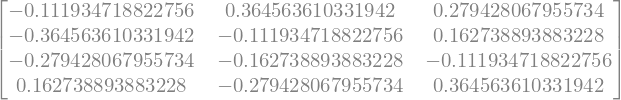

In [91]:
display(jacobian)

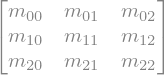

In [92]:
R = sf.M33.symbolic('m')
display(R)

In [93]:
from symforce.notebook_util import display_code
display_code(R,"latex")


AttributeError: 'Matrix33' object has no attribute 'decode'

In [94]:
from IPython.display import Code
Code(R)

TypeError: Code expects text, not Matrix([
[m0_0, m0_1, m0_2],
[m1_0, m1_1, m1_2],
[m2_0, m2_1, m2_2]])